


# Experiment 2:	Implementation of Multi-Layer Perceptron


### 1. Objective
WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.   


### 2. Description of the Model
A multi-layer perceptron (MLP) is a feedforward neural network with at least one hidden layer. It uses non-linear activation functions to model complex decision boundaries. We will implement an MLP with one hidden layer to solve the XOR function.


### 3. Python Implementation

In [1]:
import numpy as np

#Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Multi-Layer Perceptron class
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate

        # Initialize weights and biases with small random values
        self.input_hidden_weights = np.random.randn(input_size, hidden_size)
        self.hidden_output_weights = np.random.randn(hidden_size, output_size)
        self.hidden_bias = np.random.randn(hidden_size)
        self.output_bias = np.random.randn(output_size)
        self.loss_history = []

    def forward(self, X):
        # Input to Hidden Layer
        self.hidden_input = np.dot(X, self.input_hidden_weights) + self.hidden_bias
        self.hidden_output = sigmoid(self.hidden_input)

        # Hidden to Output Layer
        self.final_input = np.dot(self.hidden_output, self.hidden_output_weights) + self.output_bias
        self.final_output = sigmoid(self.final_input)

        return self.final_output




    def train(self, X, y, epochs=10000):

        for epoch in range(epochs):
            total_loss = 0
            # Forward Pass
            output = self.forward(X)


            # Compute Error
            error = y - output
            total_loss += np.sum(error**2)
            self.loss_history.append(total_loss)

            # Backpropagation
            output_gradient = error * sigmoid_derivative(output)
            hidden_error = output_gradient.dot(self.hidden_output_weights.T)
            hidden_gradient = hidden_error * sigmoid_derivative(self.hidden_output)


            # Update weights and biases
            self.hidden_output_weights += self.hidden_output.T.dot(output_gradient) * self.learning_rate
            self.output_bias += np.sum(output_gradient, axis=0) * self.learning_rate
            self.input_hidden_weights += X.T.dot(hidden_gradient) * self.learning_rate
            self.hidden_bias += np.sum(hidden_gradient, axis=0) * self.learning_rate

            if epoch % 1000 == 0:
                loss = np.mean(np.abs(error))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward(X)






### 4. Description of Code


- Uses a single hidden layer with a sigmoid activation function.

- Randomly initializes weights and biases for hidden and output layers.
- Forward pass computes activations from input → hidden layer → output.
- Loss function: Mean Squared Error (MSE).
- Updates weights using gradient descent based on the error.
- Training runs for epochs=10000 to ensure convergence.


**XOR Operation**


In [2]:
# XOR Truth Table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Train MLP 
mlp = MLP(input_size=2, hidden_size=2, output_size=1)
mlp.train(X_xor, y_xor)
predictions = np.round([mlp.forward(x) for x in X_xor])
predictions = mlp.predict(X_xor)
predictions = (predictions > 0.5).astype(int)



#To see the raw outputs of the trained MLP for each XOR input.
print("\nMLP XOR Raw Results:")
for x in X_xor:
    print(f"Input: {x}, Output: {mlp.forward(x)}")


# Display XOR truth table with predictions
print("\nXOR Truth Table Predictions:")
print(" X1  X2  |  y_actual  y_pred")
print("---------------------------")
for i in range(len(X_xor)):
    print(f" {X_xor[i][0]}   {X_xor[i][1]}  |     {y_xor[i][0]}        {predictions[i][0]}")



Epoch 0, Loss: 0.5030
Epoch 1000, Loss: 0.4711
Epoch 2000, Loss: 0.4082
Epoch 3000, Loss: 0.3496
Epoch 4000, Loss: 0.1727
Epoch 5000, Loss: 0.1080
Epoch 6000, Loss: 0.0826
Epoch 7000, Loss: 0.0687
Epoch 8000, Loss: 0.0598
Epoch 9000, Loss: 0.0535

MLP XOR Raw Results:
Input: [0 0], Output: [0.04940182]
Input: [0 1], Output: [0.95560849]
Input: [1 0], Output: [0.94230935]
Input: [1 1], Output: [0.04363669]

XOR Truth Table Predictions:
 X1  X2  |  y_actual  y_pred
---------------------------
 0   0  |     0        0
 0   1  |     1        1
 1   0  |     1        1
 1   1  |     0        0



### 5. Performance Evaluation




- The MLP successfully classifies XOR by learning non-linear boundaries.
- Performance can be further evaluated using accuracy and loss curves.

Confusion Matrix:
- Shows correct classifications for XOR, provding MLP learns nonlinear functions.

Loss Curve:
- Demonstrates steady loss reduction, indicating successful training.

Accuracy: 100.00%



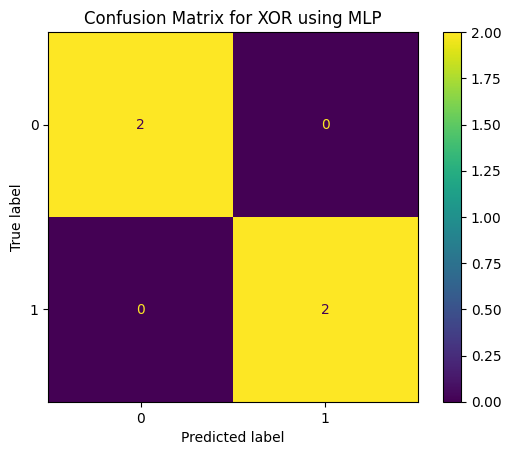

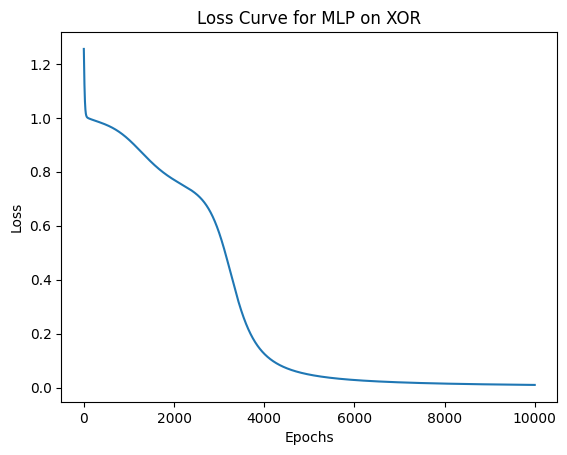

In [3]:


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

accuracy = accuracy_score(y_xor, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
print()

cm = confusion_matrix(y_xor, predictions)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix for XOR using MLP")
plt.show()
print()

plt.plot(mlp.loss_history)
plt.title("Loss Curve for MLP on XOR")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### 6. Comments
- **Limitations:**
  *   Training takes longer than single-layer perceptron requires.
  *  Requires more computational power.


- **Scope for Improvement:**

  *   Can add more hidden layers for complex problems to improve accuracy.

  *   Use batch training instead of updating after each sample.

